In [50]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt

In [31]:
def dashToNumberFormat(dashVal):
    mapping = {'6': '.75',
               '4': '.5',
               '2': '.25',
               '0': '.0'}
    try:
        pre, suf = dashVal.split("'")
        return float(pre + mapping[suf])
    except:
        return dashVal


tickSize = {
    'BRN': 0.01,
    'CL': 0.01,
    'WBS': 0.01,
    'Box': 0.01,
    'ZM': 0.1,
    'ZL': 0.01,
    'ZS': 0.25,
    'ZC': 0.25,
    'ZW': 0.25,
    'HO': 0.0001,
    'RB': 0.0001,
    'NG': 0.001,
    'G': 0.25,
    'NG|HH': 0.00025
}

tickVal = {
    'BRN': 10,
    'Box': 10,
    'CL': 10,
    'WBS': 10,
    'ZM': 10,
    'ZL': 6,
    'ZS': 12.5,
    'ZC': 12.5,
    'ZW': 12.5,
    'HO': 4.2,
    'RB': 4.2,
    'NG': 10,
    'G': 25,
    'NG|HH': 2.5
}

In [48]:
warnings.simplefilter('ignore')

df = pd.read_excel('fillSheet.xlsx', 'fills')
df['Price'] = df['Price'].apply(lambda x: dashToNumberFormat(x))
df['qty*price'] = df['FillQty'] * df['Price']
cont_grp = df.groupby('Contract')
contracts_df = pd.DataFrame(cont_grp.groups.keys())

outDf = pd.DataFrame(columns=['contract', 'netPos','buyQty', 'sellQty', 'avgBuyPrice', 'avgSellPrice'])
for name, group in cont_grp:
    try:

        total_buy_qty   = group.loc[group['B/S'] == 'B', 'FillQty'].sum()
        total_sell_qty  = group.loc[group['B/S'] == 'S', 'FillQty'].sum()

        netPos = total_buy_qty - total_sell_qty

        avg_buy  = (group.loc[group['B/S'] == 'B', 'qty*price'].sum())/total_buy_qty 
        avg_sell = (group.loc[group['B/S'] == 'S', 'qty*price'].sum())/total_sell_qty

        outDf.loc[len(outDf.index)] = [name, netPos, total_buy_qty, total_sell_qty, avg_buy, avg_sell]
    except:
        # print(group)
        pass

outDf['product'] = outDf['contract'].apply(lambda x: x.split()[0])
outDf.loc[outDf['contract'].str.contains('HH'), 'product'] = 'NG|HH'
outDf['tickSize'] = outDf['product'].apply(lambda x: tickSize[x])
outDf['tickVal'] = outDf['product'].apply(lambda x: tickVal[x])
outDf['ticksBooked'] = (outDf['avgSellPrice'] - outDf['avgBuyPrice'])/outDf['tickSize']
outDf['pnl'] = outDf['ticksBooked']*outDf['tickVal']*outDf['buyQty']
outDf['pnl'] = outDf['pnl'].round(1)
outDf.sort_values(by='pnl', inplace=True, ignore_index=True)
outDf


,contract,netPos,buyQty,sellQty,avgBuyPrice,avgSellPrice,product,tickSize,tickVal,ticksBooked,pnl
0,ZL May-Jul-Aug24 Fly,43,53,10,-0.337925,-0.346000,ZL,0.01000,6.0,-0.807547,-256.8
1,ZM Aug24-Sep24 Calendar,2,7,5,3.442857,3.340000,ZM,0.10000,10.0,-1.028571,-72.0
2,BRN Mar25-Jun25 Calendar,0,4,4,0.735000,0.717500,BRN,0.01000,10.0,-1.750000,-70.0
3,ZW Sep24 fly,-8,1,9,-2.500000,-2.833333,ZW,0.25000,12.5,-1.333333,-16.7
4,ZW Jul24 Sep24 Dec24 Butterfly,-4,5,9,2.750000,2.944444,ZW,0.25000,12.5,0.777778,48.6
5,BRN Jun24-Aug24 Calendar,0,1,1,0.530000,0.590000,BRN,0.01000,10.0,6.000000,60.0
6,Box Dec25 12M,0,3,3,0.340000,0.363333,Box,0.01000,10.0,2.333333,70.0
7,+1xNG Jun24:-1xHH Jun24,10,17,7,0.001500,0.002000,NG|HH,0.00025,2.5,2.000000,85.0
8,BRN DDMJ24-25,0,2,2,-0.080000,-0.015000,BRN,0.01000,10.0,6.500000,130.0
9,ZW Jul24 Fly,9,30,21,2.441667,2.536190,ZW,0.25000,12.5,0.378095,141.8


In [59]:
brnGrp = cont_grp.get_group('BRN Apr24 DF 2M')
brnGrp['datetime'] = pd.to_datetime(brnGrp['Date'].astype(str)) + pd.to_timedelta(brnGrp['Time'].astype(str))

brnGrp

,Date,Time,Exchange,Contract,B/S,FillQty,Price,qty*price,datetime
3,2023-11-30,17:10:52.830000,ASE,BRN Apr24 DF 2M,S,2,0.00,0.00,2023-11-30 17:10:52.830
4,2023-11-30,17:10:52.807000,ASE,BRN Apr24 DF 2M,S,2,0.00,0.00,2023-11-30 17:10:52.807
5,2023-11-30,17:06:43.008000,ASE,BRN Apr24 DF 2M,S,2,0.00,0.00,2023-11-30 17:06:43.008
6,2023-12-01,20:43:10.788000,ASE,BRN Apr24 DF 2M,B,2,-0.06,-0.12,2023-12-01 20:43:10.788
7,2023-12-01,20:43:10.788000,ASE,BRN Apr24 DF 2M,B,3,-0.08,-0.24,2023-12-01 20:43:10.788
...,...,...,...,...,...,...,...,...,...
401,2024-01-09,10:32:09.120000,ASE,BRN Apr24 DF 2M,S,3,-0.09,-0.27,2024-01-09 10:32:09.120
402,2024-01-09,10:32:09.106000,ASE,BRN Apr24 DF 2M,S,3,-0.10,-0.30,2024-01-09 10:32:09.106
434,2024-01-10,14:05:14.707000,ASE,BRN Apr24 DF 2M,S,2,-0.03,-0.06,2024-01-10 14:05:14.707
435,2024-01-10,12:48:56.967000,ASE,BRN Apr24 DF 2M,S,3,-0.04,-0.12,2024-01-10 12:48:56.967


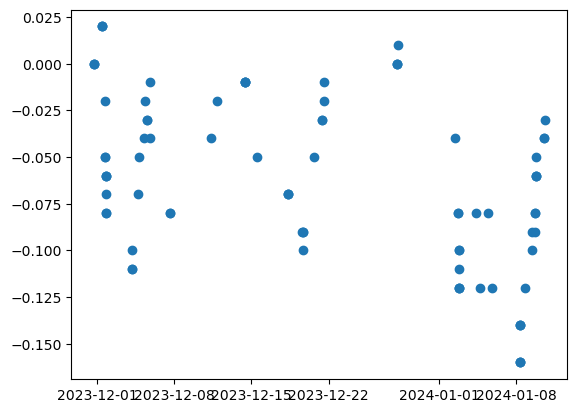

In [62]:
plt.scatter(  brnGrp['datetime'], brnGrp['Price'])